## Final Submission

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r'C:\Users\Engr. Abioye\Documents\Machine_Projects\KaggleX_Practice\train.csv')
df1= pd.read_csv(r'C:\Users\Engr. Abioye\Documents\Machine_Projects\KaggleX_Practice\test.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


C:\Users\Engr. Abioye\AppData\Local\Temp\ipykernel_7360\2077317913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

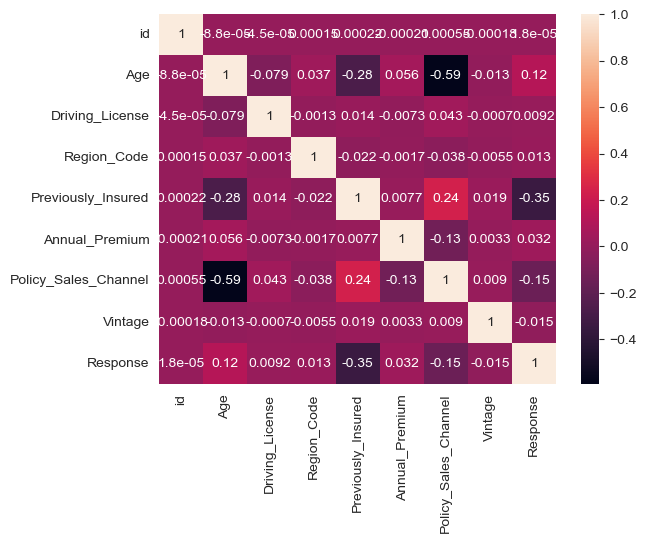

In [7]:
sns.heatmap(df.corr(), annot=True)


Feature Engineering

In [8]:
def add_feats(df):
    # Converting non-numerical features to numerical in order to check correlation with Target
    df['Gender'] = df['Gender'].apply(lambda x: 1 if x== 'Male' else 0)
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 1, '1-2 Year': 2, '> 2 Years': 3})
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
    
    # Multiplication of the features helps the model understand the intricate patterns of the data. Through interation features the model captures complex relationships between original features that models may miss. 

    df['Age x Vehicle_age'] = df['Age']* df['Vehicle_Age']     
    df['Age x Annual Premium'] = df['Age']*df['Annual_Premium']
    df['Vehicle damage x Annual_premium']= df['Vehicle_Damage']* df['Annual_Premium']

    return df

df= add_feats(df)
df1= add_feats(df1)

<Axes: >

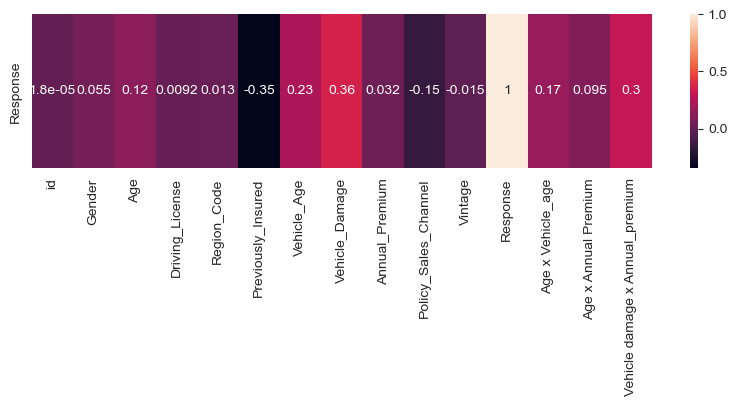

In [9]:
# Understanding how features correlate with Target "Response"
plt.figure(figsize= (10,2))
sns.heatmap(df.corr()[-4: :4], annot= True)

Building the Model: LightGBM

In [10]:
# Splitting the Training Set

from sklearn.model_selection import StratifiedShuffleSplit


# Prepare the dataset
X = df.drop(['id', 'Response', 'Driving_License', 'Gender'], axis=1)
y = df['Response']

# Using StratifiedShuffleSplit for better representation and split of the data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.17, random_state=42)
for train_index, val_index in sss.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

Using Training Dataset (df) to see how well LightGBM Performs

In [11]:
import lightgbm as lgb

In [12]:
# Create LightGBM dataset with free_raw_data=False
train_data = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data, free_raw_data=False)

# Updated parameter setup
params = {
    'objective': 'binary',
    'metric': 'auc',
    'device_type': 'cpu',
    'boosting_type': 'gbdt',
    'num_leaves': 156,
    'learning_rate': 0.075,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'max_depth': 10,
    'max_bin': 1024

}

# Train the model with updated parameters
bst = lgb.train(
    params,
    train_data,
    num_boost_round=1500,           #
    valid_sets=[val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(50)]
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1174499, number of negative: 8374483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.374282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3736
[LightGBM] [Info] Number of data points in the train set: 9548982, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122997 -> initscore=-1.964348
[LightGBM] [Info] Start training from score -1.964348
Training until validation scores don't improve for 5 rounds
[50]	valid_0's auc: 0.874152
[100]	valid_0's auc: 0.878017
[150]	valid_0's auc: 0.880082
[200]	valid_0's auc: 0.881215
[250]	valid_0's auc: 0.881866
[300]	valid_0's auc: 0.88231
[350]	valid_0's auc: 0.882609
[400]	valid_0's auc: 0.882971
[450]	valid_0's auc: 0.883151
[500]	valid_

In [13]:
# Predict
from sklearn.metrics import roc_auc_score as ras
y_pred_prob = bst.predict(X_val, num_iteration=bst.best_iteration)
roc_auc = ras(y_val, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8835590763142127


Observing Predicted Output

In [14]:
# Model performs well
y_pred_prob

array([2.98028405e-01, 3.88348755e-04, 2.86175214e-01, ...,
       3.46151257e-01, 4.34434381e-01, 5.68477914e-01])

Training Model with Test Dataset (df1)

In [15]:
# Create Dataset for model
final_df= lgb.Dataset(X, label=y, free_raw_data= False)

# Training lightgbm model with dataset (final_df)
final_model= lgb.train(
    params,
    final_df,
    num_boost_round= bst.best_iteration
)
# Note: We used the same parameters of the original model (bst) that performed well


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1415059, number of negative: 10089739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3736
[LightGBM] [Info] Number of data points in the train set: 11504798, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122997 -> initscore=-1.964348
[LightGBM] [Info] Start training from score -1.964348


In [16]:
# Creating Test Data for model
X_test= df1.drop(['id','Driving_License', 'Gender'], axis= 1)
X_test= X_test[X.columns]       # Ensuring the dataset contains same features as what was used in training the model originally


In [17]:
# Prediction
final_test_pred= final_model.predict(X_test, num_iteration= final_model.best_iteration)


In [18]:
final_test_pred

array([5.71633918e-03, 4.88327622e-01, 2.40869936e-01, ...,
       3.31349334e-04, 6.12604223e-01, 8.40280295e-05])

In [19]:
Pred_response= pd.DataFrame({
    'id': df1['id'],
    'Response': final_test_pred,
})

In [20]:
Pred_response

,id,Response
0,11504798,0.005716
1,11504799,0.488328
2,11504800,0.240870
3,11504801,0.000101
4,11504802,0.063778
...,...,...
7669861,19174659,0.185342
7669862,19174660,0.000098
7669863,19174661,0.000331
7669864,19174662,0.612604
